### 參考資料: https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [126]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [129]:
file = '5_joined_table.csv'
folder_path = 'D:\Courses\資策會_大數據班_BB105\專題\IOT\IOT-Data\\'

df = pd.read_csv(folder_path + file, engine='python')
print('untired count: ' + str(len(df[df['label'] == 0])))
print('tired count: ' + str(len(df[df['label'] == 1])))
print()
exclude_1 = '^(?!BPM)'
include_acc = '^\w{1}_acc'
include_comp = '^\w{1}_comp'
include_2 = '^(Z_acc|BPM)'
include_3 = '^Z_comp|X_comp'
include_4 = '^BPM|Y_comp|X_comp'
include_5 = '^BPM|Z_comp|X_comp|Y_comp'

x = df.iloc[:,1:-1]
x = x.filter(regex=(include_5))
print('\nfeature numbers: ' + str(len(x.columns)))
print(x.columns)

y = df.loc[:, 'label']
print(np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

untired count: 4604
tired count: 4043


feature numbers: 19
Index(['X_comp(t-5)', 'Y_comp(t-5)', 'Z_comp(t-5)', 'X_comp(t-4)',
       'Y_comp(t-4)', 'Z_comp(t-4)', 'X_comp(t-3)', 'Y_comp(t-3)',
       'Z_comp(t-3)', 'X_comp(t-2)', 'Y_comp(t-2)', 'Z_comp(t-2)',
       'X_comp(t-1)', 'Y_comp(t-1)', 'Z_comp(t-1)', 'X_comp', 'Y_comp',
       'Z_comp', 'BPM'],
      dtype='object')
[0 1]


### Decision Tree

In [80]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=None, 
                              min_samples_split=0.05,
                              min_samples_leaf=100, 
                              random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_train)
print('Training Accuracy: %.2f' % accuracy_score(y_train, y_pred))

y_pred = tree.predict(X_test)
print('Testing Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Training Accuracy: 0.70
Testing Accuracy: 0.65


In [32]:
import os
os.environ['PATH'] = os.environ['PATH'] + ('D:\\Installed_Softwares\\Anaconda3\\Library\\bin\\graphviz')
print(os.environ['PATH'])

D:\Installed_Softwares\NVIDIA GPU Computing Toolkit\CUDA\v9.0\bin;D:\Installed_Softwares\NVIDIA GPU Computing Toolkit\CUDA\v9.0\libnvvp;C:\ProgramData\Oracle\Java\javapath;C:\Program Files\Java\jdk1.8.0_111\bin;C:\Windows\System32;C:\Windows\System32\wbem;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0\;D:\Installed_Softwares\putty\;C:\Program Files\Git\cmd;D:\Installed_Softwares\Amazon\AWSCLI\;D:\Installed_Softwares\NVIDIA GPU Computing Toolkit\CUDA\v9.0\bin;D:\Installed_Softwares\NVIDIA GPU Computing Toolkit\CUDA\v9.0\lib\x64;C:\Python36\Lib\site-packages\;c:\users\zack\appdata\local\programs\python\python36\lib\site-packages;D:\Installed_Softwares\Anaconda3;D:\Installed_Softwares\Anaconda3\Library\mingw-w64\bin;D:\Installed_Softwares\Anaconda3\Library\usr\bin;D:\Installed_Softwares\Anaconda3\Library\bin;D:\Installed_Softwares\Anaconda3\Scripts;C:\Users\Zack\AppData\Local\Programs\Python\Python36\Scripts\;C:\Users\Zack\AppData\Local\

In [91]:
y_str = y.map(lambda y : str(y))

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=y_str,
                           feature_names= list(x.columns),
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')                     ## 寫出樹狀圖檔

True

### Recursive Feature Elimination

In [130]:
# feature extraction
# model = LogisticRegression()
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(x, y)
print("Num Features: %d"% fit.n_features_) 
print("Selected Features: %s"% fit.support_) 
print("Feature Ranking: %s"% fit.ranking_) 
[x for index,x in enumerate(x.columns) if fit.support_[index] == True]

Num Features: 5
Selected Features: [ True False False False False False False False False False  True False
  True False False  True False  True False]
Feature Ranking: [ 1 13 15 10  2 11  4  8  7  9  1 12  1  6  3  1  5  1 14]


['X_comp(t-5)', 'Y_comp(t-2)', 'X_comp(t-1)', 'X_comp', 'Z_comp']

### Univariate Selection

In [99]:
test = SelectKBest(k=6)
fit = test.fit(x, y)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x)
# summarize selected features
print(features[0:5,:])

[  1.336e-02   1.628e-02   3.663e-05   2.131e+00   9.078e+00   5.524e-01
   2.770e+01   5.933e+01   2.860e+01   2.137e-03   1.580e-02   1.594e-04
   1.822e+00   8.371e+00   4.608e-01   2.620e+01   5.809e+01   2.711e+01
   7.225e-02   5.285e-03   1.121e-02   1.563e+00   8.219e+00   2.089e-01
   2.475e+01   5.688e+01   2.566e+01   2.989e-02   1.966e-03   3.668e-02
   1.449e+00   8.489e+00   2.796e-01   2.337e+01   5.569e+01   2.426e+01
   6.217e-02   3.682e-02   3.706e-02   1.717e+00   1.014e+01   1.370e-01
   2.203e+01   5.452e+01   2.292e+01   1.516e-01   1.597e-01   1.731e-02
   1.543e+00   9.220e+00   4.819e-01   2.074e+01   5.338e+01   2.163e+01
   2.529e+00]
[[-5.296 -5.089 -4.639 -4.564 -4.787 -5.108]
 [-5.089 -4.639 -4.564 -4.787 -5.108 -5.081]
 [-4.639 -4.564 -4.787 -5.108 -5.081 -5.059]
 [-4.564 -4.787 -5.108 -5.081 -5.059 -5.325]
 [-4.787 -5.108 -5.081 -5.059 -5.325 -5.538]]


### Principle Component Analysis

In [103]:
pca = PCA()
x_train_pca = pca.fit_transform(x_train_std)
pca.explained_variance_ratio_

array([  9.238e-01,   2.553e-02,   2.137e-02,   1.517e-02,   5.139e-03,
         2.304e-03,   2.031e-03,   1.249e-03,   7.191e-04,   5.441e-04,
         4.403e-04,   2.950e-04,   2.459e-04,   2.270e-04,   1.666e-04,
         1.449e-04,   1.145e-04,   7.933e-05,   6.961e-05,   5.758e-05,
         5.121e-05,   5.010e-05,   4.285e-05,   3.840e-05,   2.872e-05,
         2.320e-05,   2.305e-05,   2.242e-05,   1.413e-05,   1.117e-05,
         1.023e-05,   7.389e-06,   3.290e-06,   2.573e-06,   2.362e-06,
         9.943e-07,   6.401e-07,   6.040e-07,   5.001e-07,   4.273e-07,
         3.767e-07,   3.552e-07,   3.507e-07,   3.258e-07,   3.187e-07,
         3.105e-07,   2.884e-07,   2.744e-07,   2.667e-07,   2.576e-07,
         2.403e-07,   1.555e-07,   1.405e-07,   1.102e-07,   9.311e-08,
         8.334e-08,   7.468e-08,   6.875e-08,   5.944e-08,   4.938e-08,
         3.776e-08,   2.711e-08,   8.130e-09,   5.560e-09])

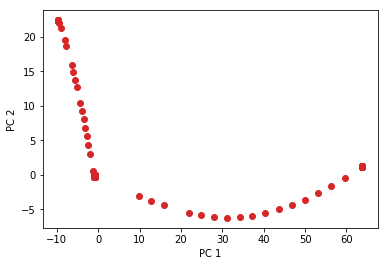

In [111]:
# 我們依樣取前兩名
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_std)
X_test_pca = pca.transform(x_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### Eigenvalues

In [124]:
cov_mat = np.cov(x_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)

tot = sum(eigen_vals)
# 將特徵值排序  並計算百分比
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
# 加總
cum_var_exp = np.cumsum(var_exp)

print()
print('var_exp: \n' + str(var_exp))
print()
print('cum_var_exp: \n' + str(cum_var_exp))


Eigenvalues 
[  5.913e+01   1.634e+00   1.368e+00   9.713e-01   3.290e-01   1.475e-01
   1.300e-01   7.997e-02   4.603e-02   3.483e-02   2.818e-02   1.888e-02
   1.574e-02   1.453e-02   1.066e-02   9.277e-03   7.327e-03   5.078e-03
   4.456e-03   3.686e-03   3.278e-03   3.207e-03   2.743e-03   2.458e-03
   1.839e-03   1.485e-03   1.475e-03   1.435e-03   9.044e-04   7.149e-04
   6.549e-04   4.729e-04   2.106e-04   1.647e-04   1.512e-04   6.365e-05
   4.097e-05   3.866e-05   3.201e-05   2.735e-05   2.411e-05   2.274e-05
   2.245e-05   2.086e-05   2.040e-05   1.987e-05   1.846e-05   1.756e-05
   1.707e-05   1.649e-05   1.538e-05   9.956e-06   8.991e-06   3.559e-07
   5.204e-07   7.055e-06   1.735e-06   2.417e-06   5.960e-06   3.161e-06
   5.335e-06   3.805e-06   4.780e-06   4.401e-06]

var_exp: 
[0.92375689217913703, 0.025529220026443936, 0.021374061233253205, 0.01517368256333515, 0.0051391278207785808, 0.0023041194908076973, 0.0020311662471266612, 0.0012493178105077202, 0.00071908281138

In [117]:
# plt.bar(range(1, 20), var_exp, alpha=0.5, align='center',
#         label='individual explained variance')
# plt.step(range(1, 20), cum_var_exp, where='mid',
#          label='cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.legend(loc='best')
# plt.tight_layout()

# plt.show()